<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Data Mining</b></center>
<center><b><h1>Lab - 6</b></center>    
<hr>   
<center><b><h1>Vatsal Parmar | 23010101196</b></center>  
<pre>


# Dimensionality Reduction using NumPy




## 🔍 What is Data Reduction?

Data reduction refers to the process of reducing the amount of data that needs to be processed and stored, while preserving the essential patterns in the data.

### Why do we reduce data?
- To reduce computational cost.
- To remove noise and redundant features.
- To improve model performance and training time.
- To visualize high-dimensional data in 2D or 3D.

Common data reduction techniques include:
- Principal Component Analysis (PCA)
- Feature selection
- Sampling



## 📉 What is Principal Component Analysis (PCA)?

PCA is a **dimensionality reduction technique** that transforms a dataset into a new coordinate system. It identifies the **directions (principal components)** where the variance of the data is maximized.

### Key Concepts:
- **Principal Components**: New features (linear combinations of original features) capturing most variance.
- **Eigenvectors & Eigenvalues**: Used to compute these principal directions.
- **Covariance Matrix**: Measures how features vary with each other.

PCA helps in **visualizing high-dimensional data**, **noise reduction**, and **speeding up algorithms**.



## 🧠 NumPy Functions Summary for PCA

| Function | Purpose |
|---------|---------|
| `np.mean(X, axis=0)` | Compute mean of each column (feature-wise mean). |
| `X - np.mean(X, axis=0)` | Centering the data (zero mean). |
| `np.cov(X, rowvar=False)` | Compute covariance matrix for features. |
| `np.linalg.eigh(cov_mat)` | Get eigenvalues and eigenvectors (for symmetric matrices). |
| `np.argsort(values)[::-1]` | Sort values in descending order. |
| `np.dot(X, eigenvectors)` | Project original data onto new axes. |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Step 1: Load the Iris Dataset

In [2]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.shape

(150, 5)

In [4]:
x = iris.drop(columns="species")
y = iris['species'].map(
    {
        "setosa": 0,
        "virginica": 1,
        "versicolor": 2
    }
)

x.shape

(150, 4)

# Step 2: Standardize the data (zero mean)

In [5]:
x_meaned = x - np.mean(x, axis=0)
print("Data after centering (First 5 rows) : \n", x_meaned[:5])
print(x_meaned.shape)

Data after centering (First 5 rows) : 
    sepal_length  sepal_width  petal_length  petal_width
0     -0.743333     0.442667        -2.358    -0.999333
1     -0.943333    -0.057333        -2.358    -0.999333
2     -1.143333     0.142667        -2.458    -0.999333
3     -1.243333     0.042667        -2.258    -0.999333
4     -0.843333     0.542667        -2.358    -0.999333
(150, 4)


# Step 3: Compute the Covariance Matrix

In [6]:
cov_mat = np.cov(x_meaned, rowvar=False)
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

# Step 4: Compute eigenvalues and eigenvectors

In [8]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

print("EigenValues : \n", eigen_values)
print("EigenVectors (First 2) : \n", eigen_vectors)

EigenValues : 
 [0.02383509 0.0782095  0.24267075 4.22824171]
EigenVectors (First 2) : 
 [[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


# Step 5: Compute eigenvalues and eigenvectors

In [9]:
sorted_index = np.argsort(eigen_values)[::-1]  # argsort -> sort by index
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

print("Sort Indedx : ",sorted_index)
print("Sort EigenValue : ",sorted_eigenvalues)
print("Sort EigenVector : ",sorted_eigenvectors)


Sort Indedx :  [3 2 1 0]
Sort EigenValue :  [4.22824171 0.24267075 0.0782095  0.02383509]
Sort EigenVector :  [[-0.36138659  0.65658877  0.58202985  0.31548719]
 [ 0.08452251  0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061 -0.17337266 -0.07623608 -0.47983899]
 [-0.3582892  -0.07548102 -0.54583143  0.75365743]]


# Step 6: Select the top k eigenvectors (top 2)

In [10]:
k = 2
eigen_vector_subset = sorted_eigenvectors[:, 0:k]
print(eigen_vector_subset.shape)

(4, 2)


# Step 7: Project the data onto the top k eigenvectors

In [11]:
x_reduced = np.dot(x_meaned, eigen_vector_subset)
print("Reduced Data Shape : ",x_reduced.shape)

Reduced Data Shape :  (150, 2)


# Step 8: Plot the PCA-Reduced Data

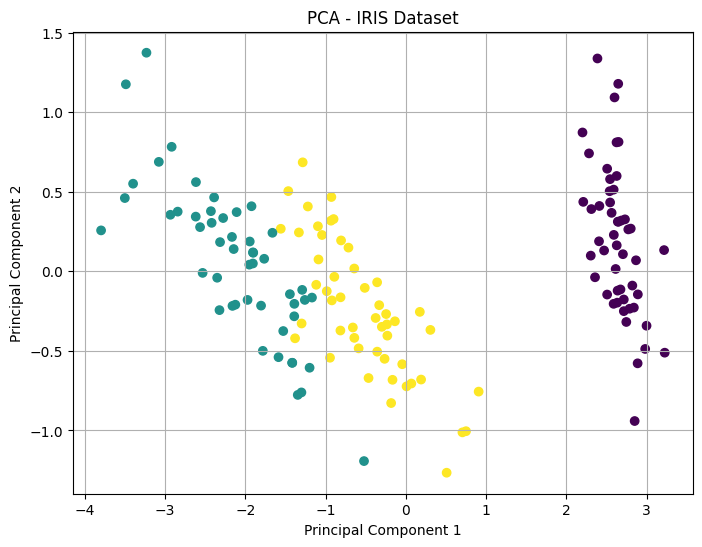

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - IRIS Dataset')
plt.grid(True)
plt.show()

In [13]:
# Summary of PCA (for only numeric value(sets))

# 1)  drop non numeric cols & mapping (non numeric columns's val)
# 2)  standardize the data (mean=0)
# 3)  find covvariance matrix
# 4)  find eigen_values and eigen_vectors
# 5)  sort all eigen_values in Decending order
# 6)  sort all eigen_vectors according to eigen_values
# 7)  select top eigen_vectors k=2 (For 2D visulization)
# 8)  dot product of x_meaned(standardize the data) and sorted_eigenvectors

# Extra - Bining Method

# 5,10,11,13,15,35,50,55,72,92,204,215.
Partition them into three bins by each of the following methods:
(a) equal-frequency (equal-depth) partitioning
(b) equal-width partitioning

In [14]:
import math

data = [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]

data.sort()

def equal_frequency_partition(data, num_bins):
    n = len(data)
    bin_size = math.ceil(n / num_bins)
    bins = [data[i:i + bin_size] for i in range(0, n, bin_size)]
    return bins

def equal_width_partition(data, num_bins):
    min_val = min(data)
    max_val = max(data)
    width = math.ceil((max_val - min_val) / num_bins)

    bins = [[] for _ in range(num_bins)]

    for value in data:
        bin_index = (value - min_val) // width
        if bin_index >= num_bins:
            bin_index = num_bins - 1
        bins[bin_index].append(value)

    return bins

num_bins = 3

freq_bins = equal_frequency_partition(data, num_bins)
width_bins = equal_width_partition(data, num_bins)

print("(a) Equal-Frequency Binning :")
for i, b in enumerate(freq_bins, 1):
    print(f"Bin {i}: {b}")

print("\n(b) Equal-Width Binning :")
for i, b in enumerate(width_bins, 1):
    print(f"Bin {i}: {b}")

(a) Equal-Frequency Binning :
Bin 1: [5, 10, 11, 13]
Bin 2: [15, 35, 50, 55]
Bin 3: [72, 92, 204, 215]

(b) Equal-Width Binning :
Bin 1: [5, 10, 11, 13, 15, 35, 50, 55, 72]
Bin 2: [92]
Bin 3: [204, 215]
